In [1]:
#경로지정 방법에서 상대경로에서

#read_csv("titanic/asdf") 이런식으로

# 참고로 실행결과 없애려면 단축키 지정하면됨 clear cell output에서
# 일단 h로 정함 여기선

### 상대경로에서...

./ : 현재
../ : 부모

In [18]:
import pandas as pd
train=pd.read_csv("./titanic/train.csv",index_col="PassengerId") # 경로쓸 때도 tap누르면 그 글자로 시작되는 경로들 선택 가능하거나 하나있으면 완성시켜줌 ㅎㄷㄷ
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
import pandas as pd
test=pd.read_csv("./titanic/test.csv",index_col="PassengerId") # 경로쓸 때도 tap누르면 그 글자로 시작되는 경로들 선택 가능하거나 하나있으면 완성시켜줌 ㅎㄷㄷ
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore : 데이터 살펴보기

그래프를 그려서 대충 살펴보자(일단 그래프를 어케 그리는지 연습해보자)

In [15]:
import seaborn as sns  #seaborn은 유명한 시각화 패키지 간단하게 괜찮은 그래프로 만들 수 있음
%matplotlib inline # matplotlib 은 정말 유명한 간단한 시각화인데,,, 옵션 하나하나 다 지정해야해서 귀찮을 때가 있음, 세세한 조정가능하지만
 ## matplotlib을 좀더 편하게 쓰게 만들어진게 seaborn임, ->matplotlib의 세밀한 것을 가져와서 쓸 수도 있음
## 따라서 기본을 seaborn을 쓰고 디데팅ㄹ은 matplotlib사용
# inline은 실행하는데 화면에는 띄우지 않게 하는거
# %은 머징

# seaborn사이트가서 원하는 그래프형식이 있으면 대충 보고 배끼면 됨

## 지금부터 5개의 간단한 시각화를 배울거임 내가 보고 인사이트 얻을 거니까 휘양찬란한건 필요 없다구
    

UsageError: unrecognized arguments: # matplotlib 은 정말 유명한 간단한 시각화인데,,, 옵션 하나하나 다 지정해야해서 귀찮을 때가 있음, 세세한 조정가능하지만


### countplot

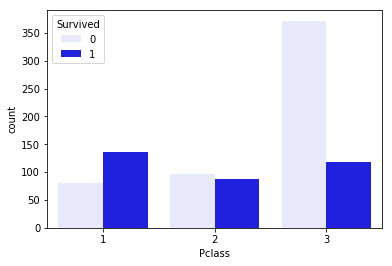

In [21]:
sns.countplot(data=train,x='Pclass',hue='Survived',color='blue') #hue는 기준을 하나 더 정해서 쪼갠다

 ### barplot

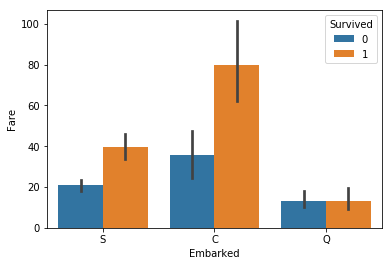

In [24]:
sns.barplot(data=train,x='Embarked',y='Fare',hue='Survived') # y값 지정이 특징- 기본적으로 평균을 보여줌(막대가)
# 검은 막대를 신뢰구간이라고 부름->데이터가 대부분 검은 막대 안에서 존재함

#### 데이터 분석 할 때 한번에 수치를 2개 이상 보는걸 권장 ####
# 예를 들어 평균만 본다면 정말 안좋을 수 있음

### Pointplot

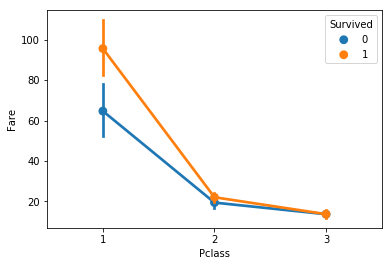

In [26]:
sns.pointplot(data=train,x='Pclass',y='Fare',hue='Survived')
# barplot과 기능이 완전히 동일
# 모양만 점과 선으로 이루어짐
# 따라서 변화나 추세를 볼 때 barplot보다는 pointplot이 좋음

### lmplot  (i가 아니라 L임 맨 앞에)

In [37]:
#sns.lmplot(data=train,x='Age',y='Fare',hue='Survived',fit_reg=False) # 특징이 선이 있음 ->회귀선(추세선)
#fit_reg=False로 바꾸면 선 없앨 수 있음 ->그럼 scatterplot가 됨


#그래프를 키우자->그래프를 자르거나 점을 줄이거나 그래프를 크게하거나
# 자를꺼임
# fare가 500근처에 있는 친구들 때매 이상해짐 ->얘네를 '이상치' 라고 한다나?
# 자른다는건 -> 판다스로 fare가 400보다 작은 데이터 검색해서 만들면 됨
low_fare=train[train['Fare']<400]
print(low_fare.shape)
low_fare.head()

(888, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


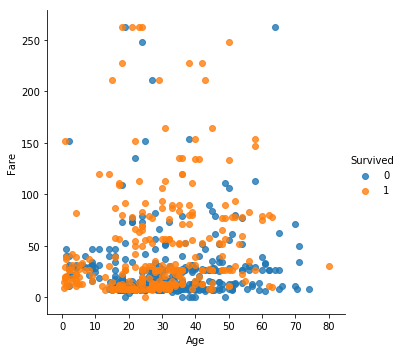

In [38]:
sns.lmplot(data=low_fare,x='Age',y='Fare',hue="Survived",fit_reg=False)

### displot

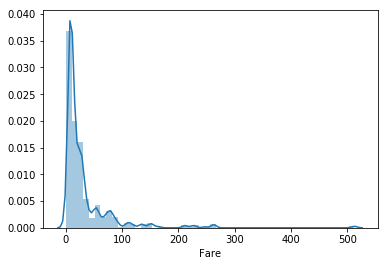

In [39]:
sns.distplot(train['Fare']) # 분포를 한번에 볼 수 있는 것 (dis는 distribution)
# column한 개의 분포만 보는거니 한개만 넣어주면 됨
# 분포 모양이 정규분포에 가까울수록 좋뎅
# 정규분포랑 모양이 너무 다르면 데이터가 일반적인 상황에서 모아진 상황이 아닌것
#            주작이든, 위험상황에서 모인 것 등등
# 그나마 이건 산 모양이긴 함. 그래도 사람 수가 적어서 애매하긴 함
# 정규분포모양에서 움푹움푹 파인 모양이 있으면 신뢰를 의심하긴 해야함.
# 지금은 Pclass가 다를 사람들이 겹쳐서 3개 봉우리가 보이는거랭


## Preprocessing : 전처리

데이터 빈 값을 지우거나 채우거나 등등을 해야함

튀는 값들을 제거하는 등 해줘야함

데이터가 너무 편향되거나 뭐하면 이런 것도 처리해줘야 함

In [41]:
# 머신러닝 알고리즘 사용할 때 최소한의 필수조건
# 1. 숫자
# 2. 비어있으면 안됨

# 우리는 Sex,Pclass,Child(Age)를 사용할 거임

### Encoding Sex

In [46]:
train['Sex'] # 보통 문자는 1,0으로 바꾸면 됨
# 여자를 1로 바꾸자 ->replace사용
## replace는 연속해서 사용할 수 있음 기억하기

train['Sex_encoded']=train['Sex'].replace('female',1).replace('male',0) # 원본은 왼만하면 보존하자 -> 새로운 column으로 만들자
# 혹은 replace말고도
#train['Sex_encoded']=train['Sex']=='female' 도 됨


cols=['Sex','Sex_encoded']
train[cols].head()

,Sex,Sex_encoded
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [45]:
test['Sex_encoded'] = test['Sex'].replace('female',1).replace('male',0)
cols=['Sex','Sex_encoded']
test[cols].head()

,Sex,Sex_encoded
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


### Pclass

In [50]:
train.dtypes ## data type들을 각 column별로 보여줌 object는 여기서는 string일 것임
test.dtypes
## 이제 비어있는지를 봐야함

Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_encoded      int64
dtype: object

### Child

In [60]:
train['Child']=train['Age']<10
cols=['Age','Child']
train[cols].head()  ## 이렇게 하면 빈 값이 없음 -> 빈 값은 False로 고정되기 때문

,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False


In [63]:
test['Child'] = test['Age']<10
cols=['Age','Child']
test[cols].head()

,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False


## Train 

데이터 정리

In [64]:
features=['Sex_encoded','Pclass','Child']
features

['Sex_encoded', 'Pclass', 'Child']

In [66]:
X_train = train[features] #대문자로 한 이유는 선형대수에서의 느낌

print(X_train.shape)
X_train.head()

(891, 3)


,Sex_encoded,Pclass,Child
PassengerId,,,
1,0,3,False
2,1,1,False
3,1,3,False
4,1,1,False
5,0,3,False


In [68]:
# 예측하려는 것을 label이라 한다

# X_train과 y_train은 짝꿍임

label = 'Survived'

y_train=train[label]

print(y_train.shape)
y_train.head()

# X_train과 y_train은 머신러닝에 줄 것임 학습하라고

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [71]:
# 맞출 승객 정보도 3가지 컬럼만 줘야겠찌

X_test=test[features]

print(X_test.shape)
X_test.head()

# y_test는 정답지이므로 Kaggle이 갖고 있으니 만들수가 없지

(418, 3)


,Sex_encoded,Pclass,Child
PassengerId,,,
892,0,3,False
893,1,3,False
894,0,2,False
895,0,3,False
896,1,3,False


## Model : 학습시키고 예측한다

In [73]:
# Machine Learning 은 인공지능에 포함되는 것
# -> 기계 학습 -> 한가지 명확한 목적을 위해(생존)

from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier 가장 유명: 노가다 뛰어주면서 우리가 했던 과정을 해줌
                                                #sklearn도 굉장히 유명한 데이터 분석에 자주쓰는 머신러닝 패키지래
                                                # 딥러닝과 부스팅(?) 빼고 거의 다 있뎅
                                        # 유명한 머신러닝 알고리즘은 거의 다 공개 되어있음
                                    # 그 이유는 이를 학습시킬 데이터가 없기 때문임.
                                #가끔씩 적당히 학습된 애들도 나오긴 한뎅
model=DecisionTreeClassifier()

model # 옵션들을 잘 지정해 주면 정답률 애짐


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
model.fit(X_train,y_train) # fit은 학습시키기 ->정보와 정답지를 준다. 그럼 학습한다. 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
prediction=model.predict(X_test)  # 위에서 분석한 것을 기반으로 X_test대해 예측함

print(prediction.shape)
prediction[:5] # prediction은 데이터프레임이 아니라서 슬라이싱해줘야함(ndarray인 것 같음)


(418,)


array([0, 0, 0, 0, 0], dtype=int64)

## Submit

In [79]:
#제출형식이 있었지 kaggle엔
submission=pd.read_csv("./titanic/gender_submission.csv")

submission['Survived'] = prediction # 제출형식에 있는 Survived 컬럼을 예측한 것으로 덮어씌운다

print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [80]:
# Pandas는 항상 index를 만들기 때문에 이대로 옮기면 컬럼 3개가 나옴

submission.to_csv("./titanic/submission.csv",index=False) #따라서 index=False를 붙여서 인덱스 빼고 저장시킴


# 머신러닝은 갖고있는 걸 기반으로 예측하는 것이므로

# 대충 머신러닝으로는 0.85까지는 맞출 수 있음

# 물론 데이터가 좋으면 0.9까지도 오를 수 있음

# 데이터가 안좋으면 예측 존나 못하겠지

# 머신러닝을 이용할 때 절대적인 결과가 나오진 않음

# 상대적인 결과가 나옴->백분율 정도로

# 따라서 데이터를 정리하는게 정말 중요함